# Greenhouse Forcing Formulas

Purpose: Check accuracy of linear approximations to greenhouse gas forcing formulas from the reference at the end of this notebook

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math 
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17CH4')

Read three input files separately and assign the year values and methane concentration data

In [2]:
f0 = 0.47
f1 = 0.0000201 
f2 = 5.31*10**-15
e1 = 0.75
e2 = 1.52
alpha = 5.35
beta = 0.036
eps = 0.12
c0 = 278 
m0 = 722
n0 = 270
# cpre = 277.853 # from heat17<co2>prefit16dec.nb
cpre = 277.8528581584792 # from heat17<co2>prefit16dec.nb
# ch4pre = 722.065 # from heat17<ch4>dec14.nb
ch4pre = 732.138795855232 # from heat17<ch4>dec14.nb
# n2opre = 267.291 # from heat17<n2o>dec.nb
n2opre = 267.2913217292295 # from heat17<n2o>dec.nb

# f1 = open('C:\\Users\\cd7\\Desktop\\Heat17CH4\\CAGE_Pop_Parameters.csv','r')
# readFile = csv.reader(f1)
# data = [row for row in readFile]
# b21 = float(data[3][1])

# f1 = open('C:\\Users\\cd7\\Desktop\\Heat17CH4\\CAGE_Pop_Parameters.csv','r')
# readFile = csv.reader(f1)
# data = [row for row in readFile]
# b21 = float(data[3][1])

# f1 = open('C:\\Users\\cd7\\Desktop\\Heat17CH4\\CAGE_Pop_Parameters.csv','r')
# readFile = csv.reader(f1)
# data = [row for row in readFile]
# b21 = float(data[3][1])

Define fitted function

In [3]:
# m = float()
# print (m)
# n = float()
# def fch4(m):
#     y1 = f0*(1+f1*(m*n0)**e1+f2*m0*(m0*n0)**e2)
#     return y1
def fch4(m):
    y1 = f0*math.log((1+f1*(m*n0)**e1+f2*m*(m*n0)**e2))
    return y1

def fn2o(n):
    y2 = f0*math.log((1+f1*(m0*n)**e1+f2*m0*(m0*n)**e2))
    return y2

f00 = f0*math.log(1 + f1*(m0*n0)**e1 + f2*m0*(m0*n0)**e2)
print (f00)

def ch4raw(m):
    y3 = beta*(math.sqrt(m)-math.sqrt(m0))-(fch4(m)-f00)
    return y3
ch40 = ch4raw(ch4pre)

def ch4(m):
    y4 = ch4raw(m)-ch40
    return y4
def n2oraw(n):
    y5 = eps*(math.sqrt(n)-math.sqrt(n0))-(fn2o(n)-f00)
    return y5
n2o0 = n2oraw(n2opre)
print (n2o0)

def n2o(n):
    y6 = n2oraw(n)-n2o0
    return y6

def co2raw(c):
    y7 = alpha*math.log(c/c0)
    return y7
co20 = co2raw(cpre)
print (co20)

def co2(c):
    y8 = co2raw(c) - co20
    return y8

# max = [404.507, 1852.5, 329.28]  # 2017? co2 concentration, prefer actual data
max = [405.0503736067324, 1849.8406681064891, 329.79999999999995]  # 2017? co2 concentration, prefer actual data
# ff = np.vectorize(co2)
# c = np.linspace(cpre, max[0],1000)
# plt.figure()
# plt.plot(c,ff(c), label="CO2")
# plt.xlabel('ppm')
# plt.ylabel('W/$m^2$') 
# plt.legend(loc='best')
# plt.savefig('co12.eps',dpi=1000)
# plt.savefig('co12.pdf',dpi=1000)

# fff = np.vectorize(ch4)
# m = np.linspace(m0, max[1],1000)
# plt.figure()
# plt.plot(m,fff(m), label="CH4")
# plt.xlabel('ppm')
# plt.ylabel('W/$m^2$') 
# plt.legend(loc='best')
# plt.savefig('ch412.eps',dpi=1000)
# plt.savefig('ch412.pdf',dpi=1000)

# ffff = np.vectorize(n2o) # Generalized function class.
# n = np.linspace(n0, max[2],1000)
# plt.figure()
# plt.plot(n,ffff(n), label="N2O")
# plt.xlabel('ppm')
# plt.ylabel('W/$m^2$') 
# plt.legend(loc='best')
# plt.savefig('n2o2.eps',dpi=1000)
# plt.savefig('n2o2.pdf',dpi=1000)






0.08053070047056604
-0.009356459024928182
-0.002832436170722387


In [4]:
min = [cpre, ch4pre, n2opre]

In [5]:
new_list=[]
for i in range(0,len(max)):
    sub_list=[]
    for m in range(1,102):
        x = min[i]+(m-1)*(max[i]-min[i])/100
        sub_list.append(float(x))
    new_list.append(sub_list)
print(new_list)
# print(new_list[0])
# print(len(new_list[0]))

# for 
# y1 = [co2raw(c) for c in float(new_list[0][i] for i in range(0,len(new_list[0])))]
# for i in range(0,len(new_list[0]))
#     x = np.array(new_list[0][i])
# y = co2raw(x)
# print (y)
# y1 = []
# # fffff = np.vectorize(co2raw) # Generalized function class.
# for i in range(0,len(new_list[0])):
#     x = new_list[0][i]
#     y = co2raw(x)
#     y1.append(y)
# print (y1)

g = []
for m in range(0,len(new_list)):
    ym = []
    for i in range(0,len(new_list[m])):
        x = new_list[m][i]
        if m == 0:
            y = co2raw(x)
        elif m == 1:
            y = ch4raw(x)
        elif m == 2:
            y = n2oraw(x)
        ym.append(float(y))
    g.append(ym)
# print (g)
# print (g[0])
# plt.figure()
# plt.plot(new_list[0],g[0],label='CO2')
# plt.xlabel('ppm')
# plt.ylabel('W/$m^2$')
# plt.legend(loc='best')

# plt.figure()
# plt.plot(new_list[1],g[1],label='CH4')
# plt.xlabel('ppb')
# plt.ylabel('W/$m^2$')
# plt.legend(loc='best')

# plt.figure()
# plt.plot(new_list[2],g[2],label='N2O')
# plt.xlabel('ppb')
# plt.ylabel('W/$m^2$')
# plt.legend(loc='best')

    

[[277.8528581584792, 279.1248333129617, 280.39680846744426, 281.66878362192676, 282.9407587764093, 284.21273393089183, 285.4847090853744, 286.7566842398569, 288.02865939433946, 289.30063454882196, 290.5726097033045, 291.844584857787, 293.1165600122696, 294.3885351667521, 295.66051032123465, 296.93248547571716, 298.2044606301997, 299.4764357846822, 300.7484109391648, 302.0203860936473, 303.29236124812985, 304.56433640261235, 305.8363115570949, 307.1082867115774, 308.38026186606, 309.6522370205425, 310.92421217502505, 312.19618732950755, 313.4681624839901, 314.7401376384726, 316.0121127929552, 317.2840879474377, 318.55606310192024, 319.82803825640275, 321.1000134108853, 322.3719885653678, 323.6439637198504, 324.9159388743329, 326.18791402881544, 327.45988918329795, 328.7318643377805, 330.003839492263, 331.2758146467455, 332.5477898012281, 333.81976495571064, 335.09174011019314, 336.36371526467565, 337.6356904191582, 338.90766557364077, 340.1796407281233, 341.4516158826058, 342.7235910370

In [6]:
x1 = new_list[0]
print (min[0])
def linear1(x1,b0,b1):
     y = b1*(x1-min[0])+b0 
     return y
param_bounds=([-1,-1],[1,1]) # set the parameter
# searching bound
popt1,pcov = curve_fit(linear1, x1, g[0],bounds=param_bounds) # popt is the optimal values for the
# parameters so that the sum of the squared residuals 
# of is minimized
print (popt1)

277.8528581584792
[0.06433401 0.01578099]


In [7]:
x2 = new_list[1]
def linear2(x2,b2,b3):
     y = b3*(x2-min[1])+b2 
     return y
param_bounds=([-1,-1],[1,1]) # set the parameter
# searching bound
popt2,pcov = curve_fit(linear2, x2, g[1],bounds=param_bounds) # popt is the optimal values for the
# parameters so that the sum of the squared residuals 
# of is minimized
print (popt2)

[0.02819819 0.00044569]


In [8]:
x3 = new_list[2]
def linear3(x3,b4,b5):
     y = b5*(x3-min[2])+b4
     return y
param_bounds=([-1,-1],[1,1]) # set the parameter
# searching bound
popt3,pcov = curve_fit(linear3, x3, g[2],bounds=param_bounds) # popt is the optimal values for the
# parameters so that the sum of the squared residuals 
# of is minimized
print (popt3)

[-0.00749785  0.00327679]


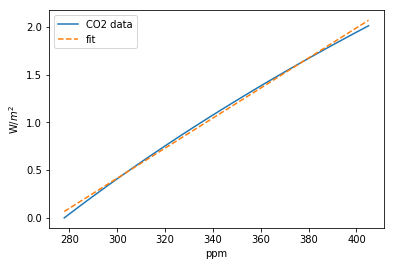

In [9]:
plt.figure()
plt.plot(new_list[0],g[0],label='CO2 data')
x = np.array(x1)
y = linear1(x, *popt1)
plt.plot(x,y,'--', label='fit')
plt.xlabel('ppm')
plt.ylabel('W/$m^2$')
plt.legend(loc='best')
plt.savefig('co2l.eps',dpi=1000)
plt.savefig('co2l.pdf',dpi=1000)
plt.show()

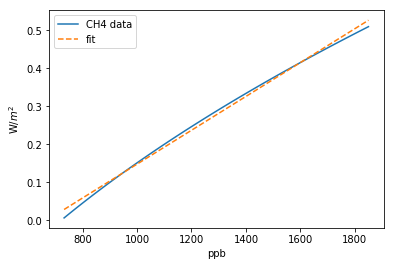

In [10]:
plt.figure()
plt.plot(new_list[1],g[1],label='CH4 data')
x = np.array(x2)
y = linear2(x, *popt2)
plt.plot(x,y,'--', label='fit')
plt.xlabel('ppb')
plt.ylabel('W/$m^2$')
plt.legend(loc='best')
plt.savefig('ch4l.eps',dpi=1000)
plt.savefig('ch4l.pdf',dpi=1000)
plt.show()

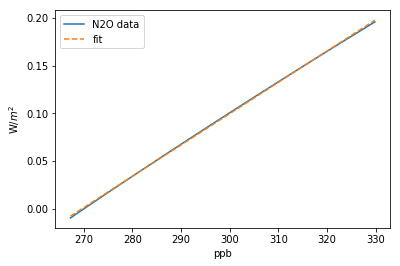

In [11]:
plt.figure()
plt.plot(new_list[2],g[2],label='N2O data')
x = np.array(x3)
y = linear3(x, *popt3)
plt.plot(x,y,'--', label='fit')
plt.xlabel('ppb')
plt.ylabel('W/$m^2$')
plt.legend(loc='best')
plt.savefig('n2ol.eps',dpi=1000)
plt.savefig('n2ol.pdf',dpi=1000)
plt.show()